<a href="https://colab.research.google.com/github/anbergman/expmetII/blob/main/Notenbooks/FFT/FFT_introduktion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testexempel för numerisk Fouriertransform med Python och *Numpy*

Ex. 1: Fouriertransform och Fourierkoeffcienter

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
from matplotlib import rcParams
rcParams['lines.markersize'] = 10
rcParams['lines.markerfacecolor'] ='None'
rcParams['lines.markeredgewidth'] = 2.0
rcParams['lines.linewidth'] = 1.0

Definiera intervall och funktioner

In [70]:
k=np.linspace(0,N-1,N)
t=k*2.0*np.pi/N

In [71]:
s_fac=5;
c_fac=2;
sf=np.sin(s_fac*t);
cf=np.cos(c_fac*t);
f=1*cf+3*sf;

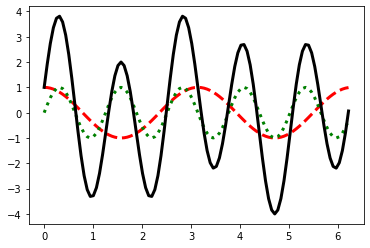

In [72]:
plt.figure()
plt.plot(t,cf,'r--')
plt.plot(t,sf,'g:')
plt.plot(t,f,'k')
plt.show()

Fouriertransformera

In [73]:
S=np.fft.fft(sf)
Sa=np.abs(S)
Sr=np.real(S)
Si=np.imag(S)
C=np.fft.fft(cf)
Ca=np.abs(C)
Cr=np.real(C)
Ci=np.imag(C)
F=np.fft.fft(f)
Fa=np.abs(F)
Fr=np.real(F)
Fi=np.imag(F)

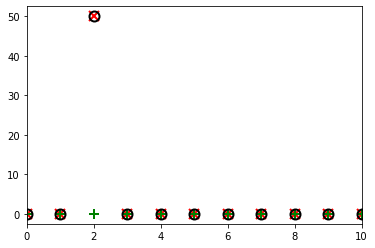

In [74]:
plt.figure()
plt.plot(k,Cr,'rx')
plt.plot(k,Sr,'g+')
plt.plot(k,Fr,'ko')
plt.xlim(0,10)
plt.show()

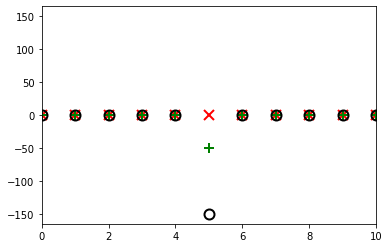

In [75]:
plt.figure()
plt.plot(k,Ci,'rx')
plt.plot(k,Si,'g+')
plt.plot(k,Fi,'ko')
plt.xlim(0,10)
plt.show()

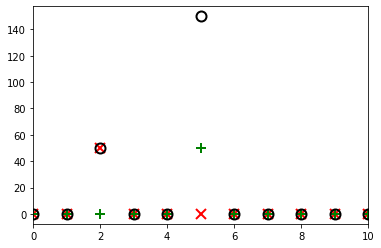

In [76]:
plt.figure()
plt.plot(k,Ca,'rx')
plt.plot(k,Sa,'g+')
plt.plot(k,Fa,'ko')
plt.xlim(0,10)
plt.show()

Jämför med Fourierkoefficienter

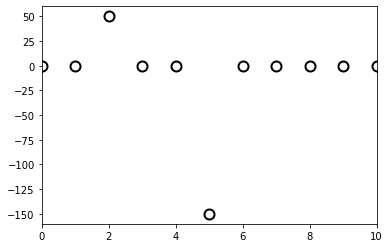

In [77]:
plt.figure()
plt.plot(k,Fr+Fi,'ko')
plt.xlim(0,10)
plt.ylim(-160,60)
plt.show()

In [78]:
N_s=10
s_nu=np.zeros(N_s)
c_nu=np.zeros(N_s)
for nu in range(N_s):
  s_nu[nu]=np.sum(-f*np.sin(nu*t))
  c_nu[nu]=np.sum(f*np.cos(nu*t))


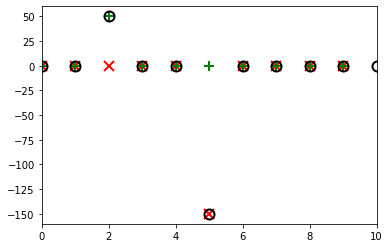

In [79]:
plt.figure()
plt.plot(s_nu,'rx')
plt.plot(c_nu,'g+')
plt.plot(k,Fr+Fi,'ko')
plt.xlim(0,10)
plt.ylim(-160,60)
plt.show()

Ex 2: Periodicitet vs. Fouriertransform

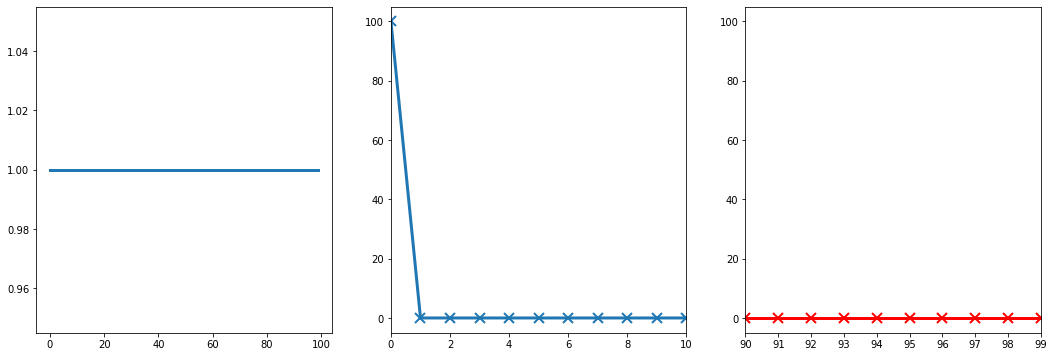

In [98]:
f_0=1.0+0.0*np.cos(1.0*t)+0.0*np.cos(2.0*t)
F_0=np.real(np.fft.fft(f_0))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(18,6))
ax1.plot(k,f_0)
ax2.plot(k,F_0,'x-')
ax3.plot(k,F_0,'rx-')
ax2.set_xlim(0,10)
ax3.set_xlim(N-10,N-1)
plt.show()

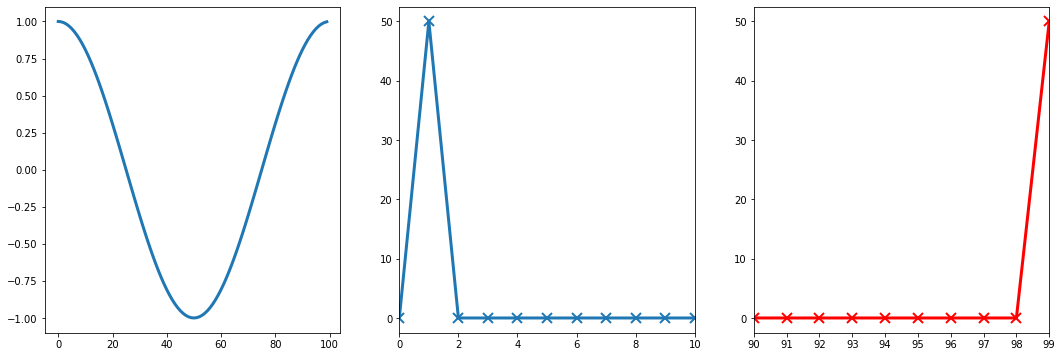

In [97]:
f_1=0.0+1.0*np.cos(1.0*t)+0.0*np.cos(2.0*t)
F_1=np.real(np.fft.fft(f_1))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(18,6))
ax1.plot(k,f_1)
ax2.plot(k,F_1,'x-')
ax3.plot(k,F_1,'rx-')
ax2.set_xlim(0,10)
ax3.set_xlim(N-10,N-1)
plt.show()

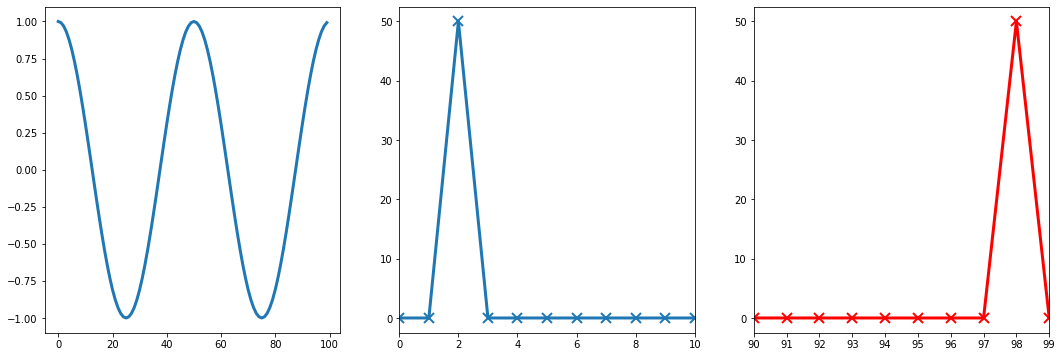

In [99]:
f_2=0.0+0.0*np.cos(1.0*t)+1.0*np.cos(2.0*t)
F_2=np.real(np.fft.fft(f_2))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(18,6))
ax1.plot(k,f_2)
ax2.plot(k,F_2,'x-')
ax3.plot(k,F_2,'rx-')
ax2.set_xlim(0,10)
ax3.set_xlim(N-10,N-1)
plt.show()

Ex 3. Översampling

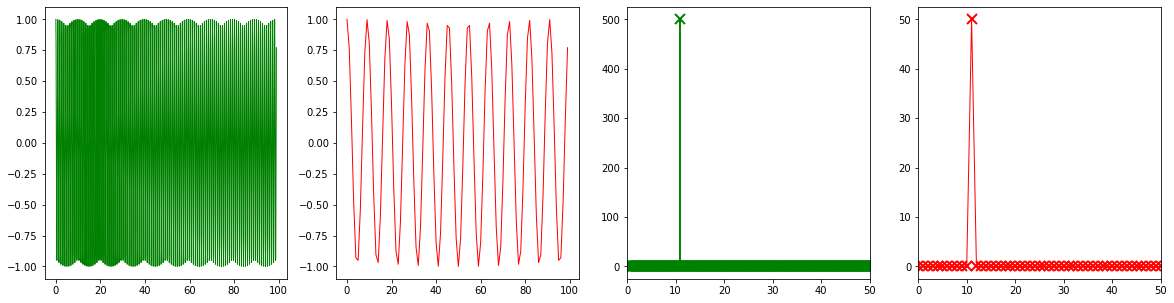

In [136]:
k_fine=np.linspace(0,N-1,10*N)
t_fine=k_fine*2.0*np.pi/N

f_a=np.cos(111*t)
f_b=np.cos(111*t_fine)
F_a=np.real(np.fft.fft(f_a))
F_b=np.real(np.fft.fft(f_b))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(20,5))
ax1.plot(k_fine,f_b,'g')
ax2.plot(k,f_a,'r')
ax3.plot(k_fine,F_b,'gx-')
ax4.plot(k,F_a,'rx-')
ax3.set_xlim(0,50)
ax4.set_xlim(0,50)
plt.show()

Ex 4. Inkommensurabilitet

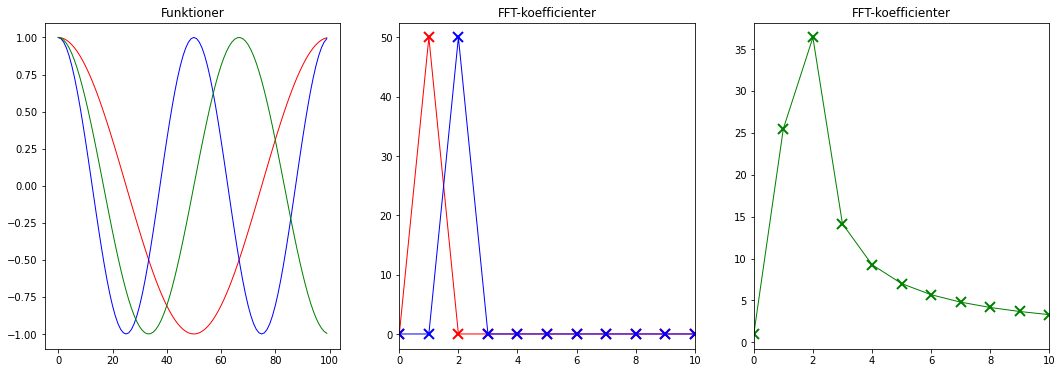

In [151]:
f_1=0.0+1.0*np.cos(1.0*t)+0.0*np.cos(2.0*t)
f_2=0.0+0.0*np.cos(1.0*t)+1.0*np.cos(2.0*t)
f_1b=0.0+1.0*np.cos(1.5*t)+0.0*np.cos(2.0*t)
F_1=np.abs(np.fft.fft(f_1))
F_2=np.abs(np.fft.fft(f_2))
F_1b=np.abs(np.fft.fft(f_1b))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(18,6))
ax1.plot(k,f_1,'r')
ax1.plot(k,f_2,'b')
ax1.plot(k,f_1b,'g')
ax1.set_title('Funktioner')
ax2.plot(k,F_1,'rx-')
ax2.plot(k,F_2,'bx-')
ax2.set_title('FFT-koefficienter')
ax3.plot(k,F_1b,'gx-')
ax3.set_title('FFT-koefficienter')
ax2.set_xlim(0,10)
ax3.set_xlim(0,10)
plt.show()

Ex. 5: Fönstring

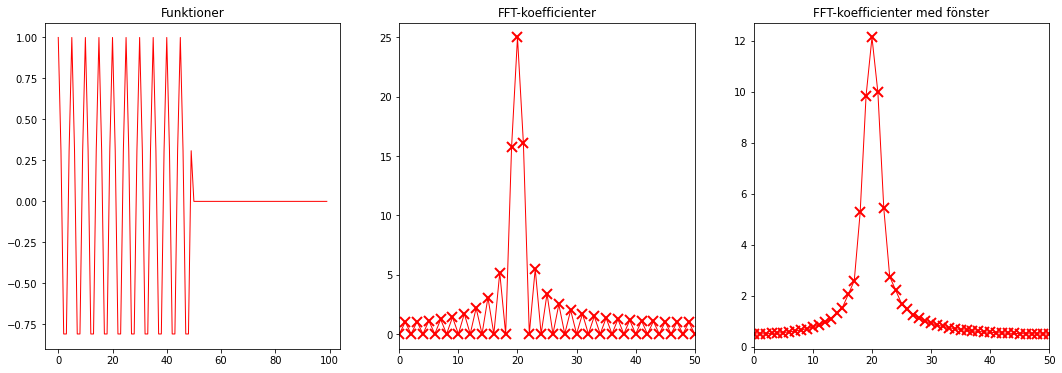

In [174]:
f_t=1.0*np.cos(20.0*t)
f_t[np.int32(N/2):]=0.0
F_t=np.abs(np.fft.fft(f_t))
F_th=np.abs(np.fft.fft(f_t*np.hanning(N)))
F_tb=np.abs(np.fft.fft(f_t*np.blackman(N)))


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(18,6))
ax1.plot(k,f_t,'r')
ax1.set_title('Funktioner')
ax2.plot(k,F_t,'rx-')
ax2.set_title('FFT-koefficienter')
ax3.plot(k,F_th,'rx-')
ax3.set_title('FFT-koefficienter med fönster')

Nhalf=np.int32(N/2)
ax2.set_xlim(0,Nhalf)
ax3.set_xlim(0,Nhalf)
ax4.set_xlim(0,Nhalf)
plt.show()

Ex. 6: Brusreducering

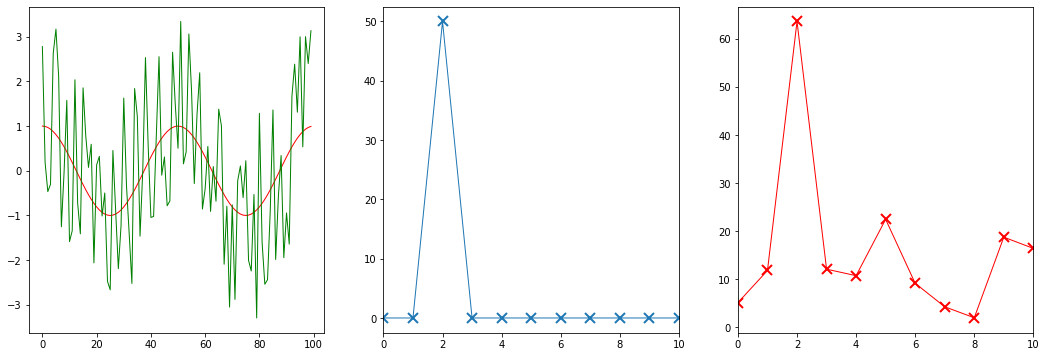

In [185]:
f_2=0.0+0.0*np.cos(1.0*t)+1.0*np.cos(2.0*t)
f_2r=0.0+0.0*np.cos(1.0*t)+1.0*np.cos(2.0*t)+5*(np.random.rand(N)-0.5)
F_2=np.abs(np.fft.fft(f_2))
F_2r=np.abs(np.fft.fft(f_2r))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(18,6))
ax1.plot(k,f_2,'r')
ax1.plot(k,f_2r,'g')
ax2.plot(k,F_2,'x-')
ax3.plot(k,F_2r,'rx-')
ax2.set_xlim(0,10)
ax3.set_xlim(0,10)
plt.show()